In [4]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.4.1.
The scikit-learn version is 0.20.3.


In [5]:
print(__doc__)
from time import time
import pickle

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)

Automatically created module for IPython interactive environment


读取test data做可视化

In [6]:
#原先14个数据出图

digits = pd.read_csv('test_data.csv')
#digits = datasets.load_digits(n_class=6)
# digits = digits.iloc[:,1:]
# X = digits[:,:2251]
scaler = MinMaxScaler()
X = scaler.fit_transform(digits.iloc[:,1:])

#y = digits[:,-1]
n_samples, n_features = X.shape
n_neighbors = 5

X = np.array(X)

y = np.array([67,67,67,71,71,71,8,8,8,8,90,90,90])

In [8]:
#用于测试19个数据

digits = pd.read_csv('test_data_19.csv')
scaler = MinMaxScaler()
X = scaler.fit_transform(digits.iloc[:,1:])

#y = digits[:,-1]
n_samples, n_features = X.shape
n_neighbors = 5

X = np.array(X)
y = np.array([67,67,67,71,71,71,8,8,8,8,90,90,90,7,7,9,9,9,9])

也可以读取训练数据做可视化

In [62]:
with open('train_data.pickle', 'rb') as f:
    Data = pickle.load(f)

AttributeError: 'list' object has no attribute 'shape'

In [68]:
Data = pd.DataFrame(Data)
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,2242,2243,2244,2245,2246,2247,2248,2249,2250,2251
0,0.076457,0.063292,0.070887,0.074938,0.041013,0.050127,0.059748,0.033418,0.063292,0.058735,...,0.075443,0.062786,0.065824,0.065316,0.048608,0.060759,0.071392,0.048102,0.052153,PUTYAE
1,0.050634,0.071392,0.062278,0.053672,0.031899,0.005570,0.058735,0.063797,0.040507,0.073924,...,0.045570,0.054178,0.048608,0.057216,0.073419,0.041013,0.055191,0.058735,0.068354,PUTYEI
2,0.044051,0.065824,0.049115,0.051646,0.050634,0.059240,0.068862,0.047596,0.044051,0.065824,...,0.042026,0.064305,0.067343,0.044558,0.054178,0.059748,0.070887,0.058735,0.054683,IDIWOH03
3,0.074430,0.045570,0.041013,0.046077,0.045064,0.052153,0.044558,0.048102,0.075443,0.055697,...,0.059240,0.044558,0.050127,0.072911,0.056710,0.062786,0.049621,0.045064,0.060254,IDIWOH04
4,0.046583,0.059240,0.060759,0.042026,0.055191,0.060254,0.060254,0.058735,0.057216,0.050127,...,0.066330,0.060254,0.055697,0.059240,0.064811,0.065824,0.033418,0.041013,0.064811,IDIWOH05


In [76]:
X = Data.iloc[:,:-1]
n_samples, n_features = X.shape
n_neighbors = 30
y = list(Data.iloc[:,-1])
#max(Data[0][:-1])

In [77]:
y[1]

'PUTYEI'

Org data dimension is 2251. Embedded data dimension is 2


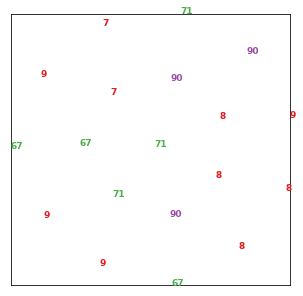

In [9]:
'''t-SNE'''
tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
X_tsne = tsne.fit_transform(X)

print("Org data dimension is {}. Embedded data dimension is {}".format(X.shape[-1], X_tsne.shape[-1]))

'''嵌入空间可视化'''
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(5, 5))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]/ 270.), fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
# ----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Computing t-SNE embedding


AttributeError: 'DataFrame' object has no attribute 'images'

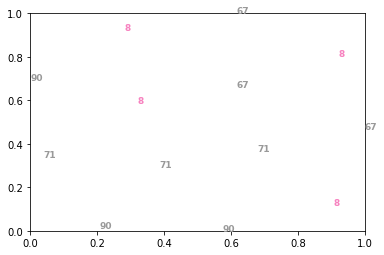

In [8]:
# ----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,"t-SNE embedding of the digits (time %.2fs)" %(time() - t0))

Computing random projection


AttributeError: 'DataFrame' object has no attribute 'images'

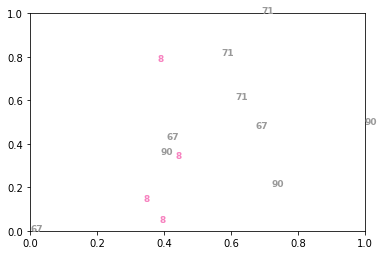

In [110]:
# ----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")

Computing PCA projection


AttributeError: 'DataFrame' object has no attribute 'images'

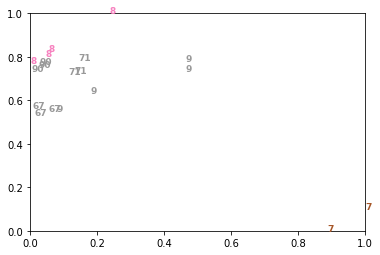

In [12]:
#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

Computing Linear Discriminant Analysis projection


/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


AttributeError: 'DataFrame' object has no attribute 'images'

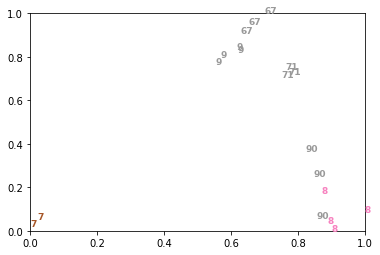

In [13]:
# ----------------------------------------------------------------------
# Projection on to the first 2 linear discriminant components

print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
plot_embedding(X_lda,
               "Linear Discriminant projection of the digits (time %.2fs)" %
               (time() - t0))

Computing Isomap projection
Done.


AttributeError: 'DataFrame' object has no attribute 'images'

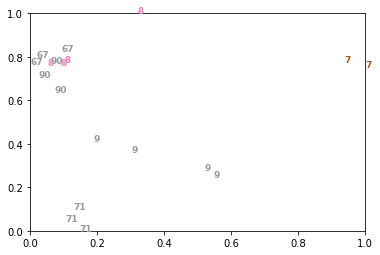

In [14]:
# ----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap projection")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))

Computing LLE embedding
Done. Reconstruction error: 0.0355762


AttributeError: 'DataFrame' object has no attribute 'images'

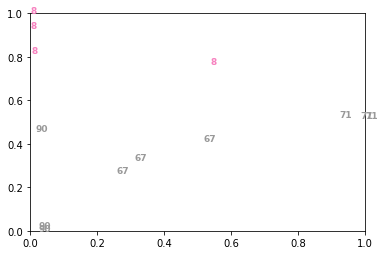

In [9]:
# ----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle,
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing modified LLE embedding
Done. Reconstruction error: 0.0807636


AttributeError: 'DataFrame' object has no attribute 'images'

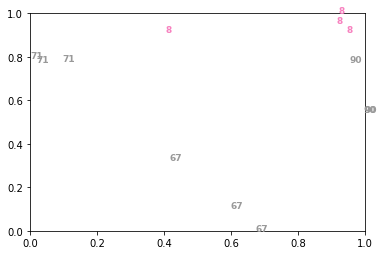

In [10]:
# ----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle,
               "Modified Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))

In [11]:
print(X_mlle)

[[-0.00908179 -0.48092315]
 [ 0.04620476 -0.57529625]
 [-0.14590518 -0.28872648]
 [-0.45654069  0.12978443]
 [-0.44232337  0.11266756]
 [-0.38396675  0.11592776]
 [ 0.24986187  0.23579097]
 [ 0.23229327  0.31182944]
 [-0.15328939  0.23475474]
 [ 0.22712918  0.27238362]
 [ 0.29160168 -0.08972249]
 [ 0.2562031   0.11320378]
 [ 0.28781332 -0.09167393]]


In [17]:
# ----------------------------------------------------------------------
# HLLE embedding of the digits dataset
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='hessian')
t0 = time()
X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_hlle,
               "Hessian Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing Hessian LLE embedding


ValueError: for method='hessian', n_neighbors must be greater than [n_components * (n_components + 3) / 2]

Computing LTSA embedding
Done. Reconstruction error: 0.00476426


AttributeError: 'DataFrame' object has no attribute 'images'

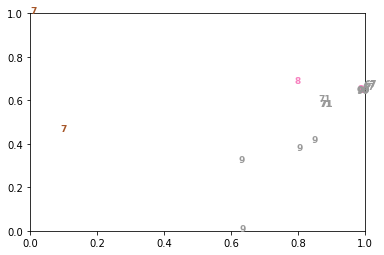

In [18]:
# ----------------------------------------------------------------------
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa,
               "Local Tangent Space Alignment of the digits (time %.2fs)" %
               (time() - t0))

Computing MDS embedding
Done. Stress: 1117.403898


AttributeError: 'DataFrame' object has no attribute 'images'

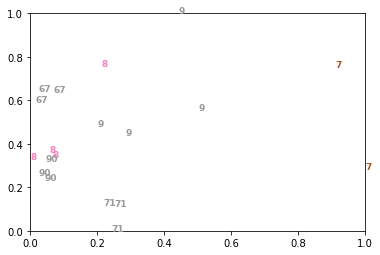

In [19]:
# ----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

In [ ]:
# ----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced,
               "Random forest embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing Spectral embedding


/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


AttributeError: 'DataFrame' object has no attribute 'images'

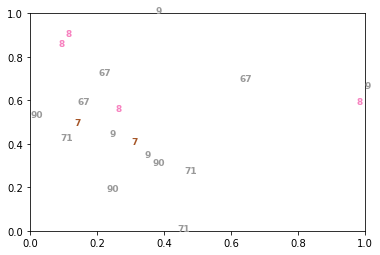

In [20]:
# ----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))

In [ ]:
# ----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

In [21]:
# ----------------------------------------------------------------------
# NCA projection of the digits dataset
print("Computing NCA projection")
nca = neighbors.NeighborhoodComponentsAnalysis(n_components=2, random_state=0)
t0 = time()
X_nca = nca.fit_transform(X, y)

plot_embedding(X_nca,
               "NCA embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

Computing NCA projection


AttributeError: module 'sklearn.neighbors' has no attribute 'NeighborhoodComponentsAnalysis'